<a href="https://colab.research.google.com/github/ian-mcnair/Google_AMLI/blob/master/Titanic_Data_Exploration_and_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Exploration and Predictions

In [0]:
# Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Loading in the data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

df = train.append(test, sort = False)
df.reset_index(drop = True, inplace = True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


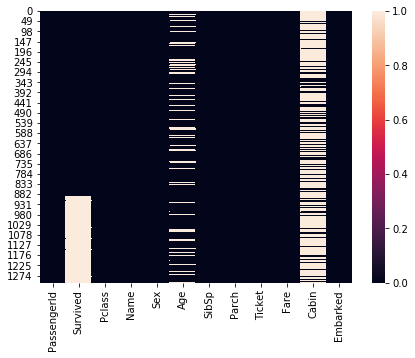

In [0]:
plt.figure(figsize = (7,5))
sns.heatmap(df.isnull())
plt.show()

## Looking at the Missing Value Columns
### Creating 2 New Features and Encoding 1
Sometimes, there is a reason that values are missing. There is probably less information on those who did not survive, so potentially, these missing values might be useful predictors.

In [0]:
# Making two additional features 'has_age' and 'has_cabin'
df['has_age'] = (df.Age > 0.0).astype(int)
df['has_cabin'] = np.where(df.Cabin.isnull(), 0, 1)
df['gender'] = (df.Sex == 'male').astype(int)

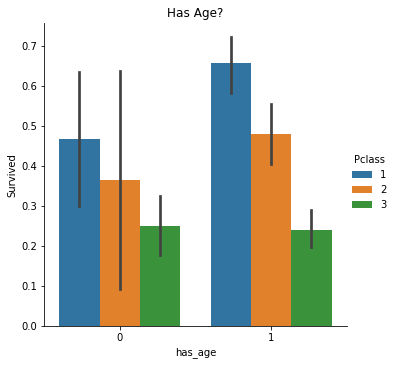

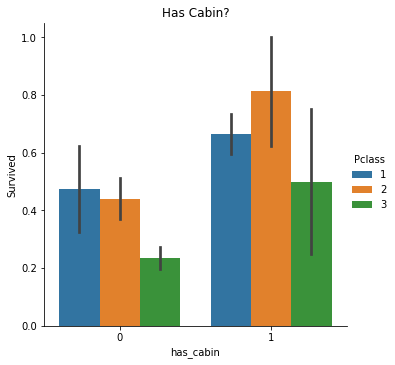

In [0]:
sns.catplot(x = 'has_age', 
            y = 'Survived', 
            hue = 'Pclass', 
            data = df, 
            kind = 'bar')
plt.title('Has Age?')
plt.show()

sns.catplot(x = 'has_cabin', 
            y = 'Survived', 
            hue = 'Pclass', 
            data = df, 
            kind = 'bar')
plt.title('Has Cabin?')
plt.show()

As we can see, there don't seem to be very large correlations between these survivability and the has_age / has_cabins features. They will be left in because they might end up helping later...

### The Age Feature
For missing values, we will impute the median to deal with outliers. Then we will bin them.

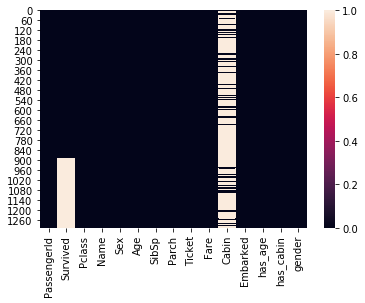

In [0]:
df.Age.fillna(df.Age.median(), inplace = True)

sns.heatmap(df.isnull()) # Verifies that all ages have been imputed

In [0]:
# Binning Age
df['Age_Cat'] = pd.qcut(df.Age, q=4, labels=False )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_age,has_cabin,gender,Age_Cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,2


### Does Having a Family Matter at All?

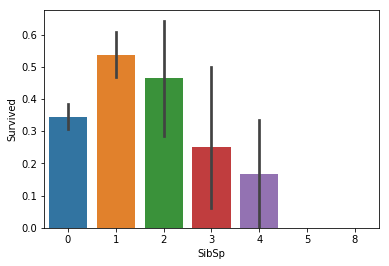

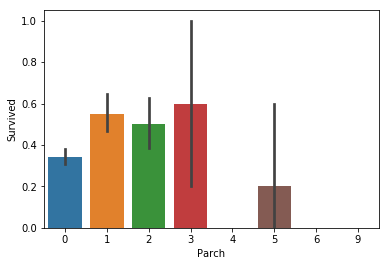

In [0]:
sns.barplot(df.SibSp, df.Survived)
plt.show()
sns.barplot(df.Parch, df.Survived)
plt.show()

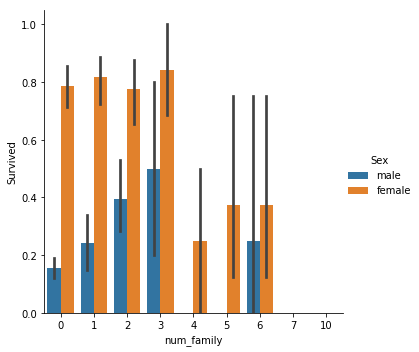

<Figure size 360x720 with 0 Axes>

In [0]:
df['num_family'] = df.SibSp + df.Parch


sns.catplot(x = 'num_family', 
            y = 'Survived', 
            hue = 'Sex', 
            data = df, 
            kind = 'bar')
plt.figure(figsize = (5,10))
plt.show()

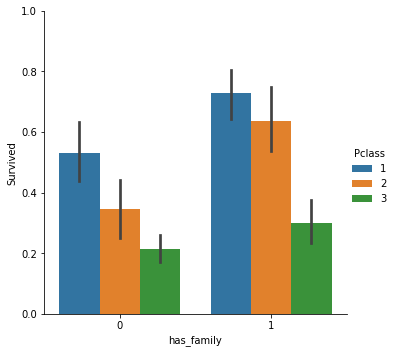

In [0]:
df['has_family'] = (df.num_family > 0).astype(int)

sns.catplot(x = 'has_family', 
            y = 'Survived', 
            hue = 'Pclass', 
            data = df, 
            kind = 'bar')
plt.ylim(0,1)
plt.show()

### Looking At Fare
Fare is interesting. There were people who only rode the titanic from from embarkment point to the next, so obviously they would not have died. Maybe it is possible to bin them at certain intervals to see how they effect survival

In [0]:
df.Fare.fillna(df.Fare.median(), inplace = True)
df['Fare_Cat'] = pd.qcut(df.Fare, q = 4, labels = False)

### Dealing with Titles

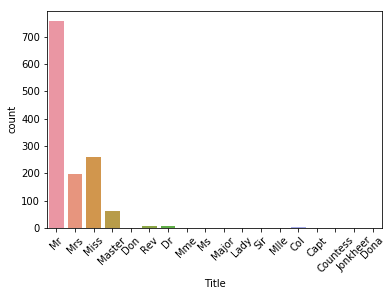

In [0]:
import re
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);

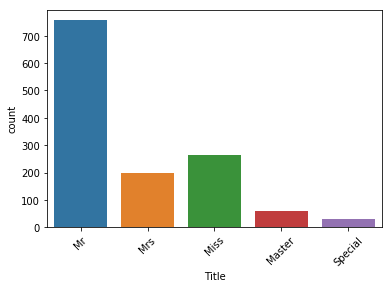

In [0]:
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=df);
plt.xticks(rotation=45);
plt.show()

## Predicting

In [0]:
df['Embarked'] = df['Embarked'].fillna('S')

In [0]:
df1, df = df.copy(), df.copy()
df = df1.copy()

In [0]:
df = pd.get_dummies(df, columns = ['Embarked', 'Title'], drop_first = True)

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'has_age', 'has_cabin', 'gender',
       'Age_Cat', 'num_family', 'has_family', 'Fare_Cat', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Special'],
      dtype='object')

In [0]:
df = df[['Pclass', 'has_age', 'has_cabin', 'gender',
       'Age_Cat', 'num_family', 'has_family', 'Fare_Cat', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Special','Survived']]

In [0]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True)

In [0]:
df = df[['Pclass', 'has_cabin', 'gender', 'has_family', 'Fare_Cat',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs','Survived']]

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

X = df.iloc[:-418, 2:3]
y = df.iloc[:-418, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
model = GaussianNB()

params = {'learning_rate': [0.01, 0.1, 1.0],
          'n_estimators': [5, 50, 100, 200]}

grid = GridSearchCV(model, params, scoring = 'accuracy', cv = 10)

grid.fit(X_train, y_train)

grid.best_params_

In [0]:
grid.cv_results_['mean_test_score']

array([0.625     , 0.80196629, 0.81039326, 0.82162921, 0.80196629,
       0.83146067, 0.83005618, 0.82303371, 0.81741573, 0.80196629,
       0.80337079, 0.7991573 ])

In [0]:
#y_pred = grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred))

[[94 17]
 [16 52]]
Accuracy:  0.8156424581005587


Using just the Test Set for Kaggle

In [0]:
df2 = df.iloc[-418:, :].copy()
# sns.heatmap(df2.isnull())

In [0]:
df2 = df2[['gender']]
# df2.drop(columns = 'Survived', inplace = True)

In [0]:
# y_pred = grid.best_estimator_.predict(df2)
y_pred = model.predict(df2)

ValueError: ignored

In [0]:
ids = pd.DataFrame(zip(df1.iloc[-418:,0], y_pred.astype(int)), columns= ['PassengerId', 'Survived'])
ids.head(50)

ids.to_csv('upload.csv', index = False)